# Data Cleaning Process

In [1]:
# import relevant libraries

import pandas as pd
import numpy as np
import seaborn as sns

import warnings

In [2]:
# set options

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
ftr = [60,1] # to convert timestring into seconds

In [3]:
# read the two datasets of 2019 - Open Athletes & Open Scores

df_19_ath = pd.read_csv('./data/2019_opens_athletes.csv')
df_19_sco = pd.read_csv('./data/2019_opens_scores.csv')

---

#### drop neglected features:

In [4]:
# from raw data description, following features can be dropped in advance:

# athletes data: competitorname, postcompstatus, profilepics3key, countryoforiginname & divisionid
ath_drop = ['competitorname', 'postcompstatus', 'profilepics3key', 'countryoforiginname', 'divisionid']
df_19_ath.drop(columns=ath_drop, axis=1, inplace=True)

# score data: judge & scoreidentifier
sco_drop = ['judge', 'scoreidentifier']
df_19_sco.drop(columns=sco_drop, axis=1, inplace=True)

---

## Reshaping Score Dataset

* reshape the score dataset in a way that each athlete become just one observation (=row) in the dataset
* thus, the score dataframe receives more features (=columns)

In [5]:
# create a new dataframe (rs - reshape):
df_19_sco_rs = df_19_sco.copy()

### extract data from rows & create new features

for each ordinal value, create following features and append to the dataframe:
* breakdown
* rank
* scaled
* score
* scoredisplay
* time

In [6]:
# create lists of feature values per observation
ordinal = df_19_sco_rs.ordinal.to_list()
breakdown = df_19_sco_rs.breakdown.to_list()
rank = df_19_sco_rs['rank'].to_list()
scoredisplay = df_19_sco_rs.scoredisplay.to_list()
time = df_19_sco_rs.time.to_list()
scaled = df_19_sco_rs.scaled.to_list()
score = df_19_sco_rs.score.to_list()

# create empty lists for new features
breakdown_1,breakdown_2,breakdown_3,breakdown_4,breakdown_5 = [],[],[],[],[]
rank_1,rank_2,rank_3,rank_4,rank_5 = [],[],[],[],[]
scoredisplay_1,scoredisplay_2,scoredisplay_3,scoredisplay_4,scoredisplay_5 = [],[],[],[],[]
time_1,time_2,time_3,time_4,time_5 = [],[],[],[],[]
scaled_1,scaled_2,scaled_3,scaled_4,scaled_5 = [],[],[],[],[]
score_1,score_2,score_3,score_4,score_5 = [],[],[],[],[]

# for each ordinal number fill new feature lists with data
for i in range(len(ordinal)):
    if ordinal[i] == 1:
        breakdown_1.append(breakdown[i])
        rank_1.append(rank[i])
        scoredisplay_1.append(scoredisplay[i])
        scaled_1.append(scaled[i])
        score_1.append(score[i])
        time_1.append(np.NaN)
    elif ordinal[i] == 2:
        breakdown_2.append(breakdown[i])
        rank_2.append(rank[i])
        scoredisplay_2.append(scoredisplay[i])
        time_2.append(time[i])
        scaled_2.append(scaled[i])
        score_2.append(score[i])
    elif ordinal[i] == 3:
        breakdown_3.append(breakdown[i])
        rank_3.append(rank[i])
        scoredisplay_3.append(scoredisplay[i])
        time_3.append(time[i])
        scaled_3.append(scaled[i])
        score_3.append(score[i])
    elif ordinal[i] == 4:
        breakdown_4.append(breakdown[i])
        rank_4.append(rank[i])
        scoredisplay_4.append(scoredisplay[i])
        time_4.append(time[i])
        scaled_4.append(scaled[i])
        score_4.append(score[i])
    elif ordinal[i] == 5:
        breakdown_5.append(breakdown[i])
        rank_5.append(rank[i])
        scoredisplay_5.append(scoredisplay[i])
        time_5.append(time[i])
        scaled_5.append(scaled[i])
        score_5.append(score[i])

# drop features whose data has been extracted
df_19_sco_rs.drop(columns='breakdown',axis=1,inplace=True)
df_19_sco_rs.drop(columns='rank',axis=1,inplace=True)
df_19_sco_rs.drop(columns='scoredisplay',axis=1,inplace=True)
df_19_sco_rs.drop(columns='time',axis=1,inplace=True)
df_19_sco_rs.drop(columns='scaled',axis=1,inplace=True)
df_19_sco_rs.drop(columns='score',axis=1,inplace=True)

# drop all observations with ordinal numbers besides 1
df_19_sco_rs.drop(df_19_sco_rs.loc[df_19_sco_rs['ordinal']!=1].index, inplace=True)
df_19_sco_rs.drop(columns='ordinal',axis=1,inplace=True)

# add breakdown features for each workout to dataframe
df_19_sco_rs['breakdown_1'] = breakdown_1
df_19_sco_rs['breakdown_2'] = breakdown_2
df_19_sco_rs['breakdown_3'] = breakdown_3
df_19_sco_rs['breakdown_4'] = breakdown_4
df_19_sco_rs['breakdown_5'] = breakdown_5

# add rank features for each workout to dataframe
df_19_sco_rs['rank_1'] = rank_1
df_19_sco_rs['rank_2'] = rank_2
df_19_sco_rs['rank_3'] = rank_3
df_19_sco_rs['rank_4'] = rank_4
df_19_sco_rs['rank_5'] = rank_5

# add scoredisplay features for each workout to dataframe
df_19_sco_rs['scoredisplay_1'] = scoredisplay_1
df_19_sco_rs['scoredisplay_2'] = scoredisplay_2
df_19_sco_rs['scoredisplay_3'] = scoredisplay_3
df_19_sco_rs['scoredisplay_4'] = scoredisplay_4
df_19_sco_rs['scoredisplay_5'] = scoredisplay_5

# add time features for each workout to dataframe
df_19_sco_rs['time_1'] = time_1
df_19_sco_rs['time_2'] = time_2
df_19_sco_rs['time_3'] = time_3
df_19_sco_rs['time_4'] = time_4
df_19_sco_rs['time_5'] = time_5

# add scaled features for each workout to dataframe
df_19_sco_rs['scaled_1'] = scaled_1
df_19_sco_rs['scaled_2'] = scaled_2
df_19_sco_rs['scaled_3'] = scaled_3
df_19_sco_rs['scaled_4'] = scaled_4
df_19_sco_rs['scaled_5'] = scaled_5

# add score features for each workout to dataframe
df_19_sco_rs['score_1'] = score_1
df_19_sco_rs['score_2'] = score_2
df_19_sco_rs['score_3'] = score_3
df_19_sco_rs['score_4'] = score_4
df_19_sco_rs['score_5'] = score_5

# reset index of reshaped dataframe
df_19_sco_rs.reset_index(inplace=True)

---

## Drop redundant information from dataframes

In both datasets there are many double competitorid values because of some divisions counted twice for athlete who belong to two divisions. Because of those divisions there are different values for overallscore and overallrank (in the athlete dataset) and for the ranks of each competition. We will drop double counted rows after overriding the values in a way that only the superordinate division (Men or Women) counts.

In [7]:
# create dataframes with sorted values (by competitorid)

df_19_ath_precomb = df_19_ath.sort_values(by=['competitorid','division'])
df_19_ath_precomb = df_19_ath_precomb.reset_index(drop=True)

df_19_sco_precomb = df_19_sco_rs.sort_values(by=['competitorid','division'])
df_19_sco_precomb = df_19_sco_precomb.reset_index(drop=True)

In [8]:
# create index-list for droping redundant division rows
# and override values for same competitorid
competitorid = df_19_ath_precomb['competitorid'].to_list()
idx = []
i = 0
while i < len(competitorid)-1:
    if competitorid[i] == competitorid[i+1]:
        idx.append(i)
        df_19_sco_precomb.at[i+1,'rank_1'] = df_19_sco_precomb.at[i,'rank_1']
        df_19_sco_precomb.at[i+1,'rank_2'] = df_19_sco_precomb.at[i,'rank_2']
        df_19_sco_precomb.at[i+1,'rank_3'] = df_19_sco_precomb.at[i,'rank_3']
        df_19_sco_precomb.at[i+1,'rank_4'] = df_19_sco_precomb.at[i,'rank_4']
        df_19_sco_precomb.at[i+1,'rank_5'] = df_19_sco_precomb.at[i,'rank_5']
        df_19_ath_precomb.at[i+1,'overallrank'] = df_19_ath_precomb.at[i,'overallrank']
        df_19_ath_precomb.at[i+1,'overallscore'] = df_19_ath_precomb.at[i,'overallscore']   
    i = i+1

In [9]:
# dataframe with unique competitorid values
df_19_ath_precomb.drop(index=idx, inplace=True)
df_19_sco_precomb.drop(index=idx, inplace=True)

---

## Combine both dataframes

In [14]:
df_19 = pd.merge(df_19_ath_precomb, df_19_sco_precomb, on=['competitorid', 'is_scaled', 'division'], how='inner')

---

## Extract Breakdown Information

---

### 19.1 - wallball shots & rowing

extract:
* reps wbs
* cals row
* number of rounds completed

In [16]:
# create a list of scoredisplay for the 1st workout
sc1 = df_19.scoredisplay_1.to_list()

In [17]:
# create empty lists for the new features
w1_reps_wbs = [] # workout 1 reps of wallball shots
w1_cals_row = [] # workout 1 cals of rowing
w1_rounds_completed = [] # workout 1 number of completed rounds

In [18]:
# get integer numbers for the amount of reps
for i in range(len(sc1)):
    if sc1[i] != 'nan' and type(sc1[i]) == str:
        x = sc1[i].split()
        sc1[i] = int(x[0])

In [19]:
# filling the empty lists with results
for i in range(len(sc1)):
    if sc1[i] != 'nan':
        rounds = sc1[i]//38
        rest = sc1[i]%38
        if rest > 19:
            result = (rounds+1)*19
        else:
            result = rounds*19 + rest
        w1_reps_wbs.append(result)
        w1_cals_row.append(sc1[i]-result)
        w1_rounds_completed.append(round(rounds+rest/38,2))
        df_19.at[i,'time_1'] = 900
    else:
        w1_reps_wbs.append(None)
        w1_rounds_completed.append(None)

---

### 19.2 - T2B, DU & Squat-Clean

extract:
* reps t2b
* reps du
* reps sqcl
* rounds completed (1-5 per weight of sqcl)
* tie break (after last round du)

In [20]:
# create lists of breakdown and scoredisplay for the 2nd workout
b2 = df_19.breakdown_2.to_list()
sc2 = df_19.scoredisplay_2.to_list()

In [21]:
# create empty lists for the new features
w2_reps_t2b = [] # workout 2 reps of toes to bar
w2_reps_du = [] # workout 2 reps of double unders
w2_reps_sqcl = [] # workout 2 reps of squat-cleans
w2_rounds_completed = [] # number of rounds completed (one round completed after last rep of squat cleans)
w2_tiebreak = [] # workout 2 tiebreak time (after last round double unders completed)

In [22]:
# get integer numbers for the amount of reps
for i in range(len(sc2)):
    if sc2[i] != 'nan' and type(sc2[i]) == str:
        if ':' not in sc2[i]:
            x = sc2[i].split()
            sc2[i] = int(x[0])
        else:
            sc2[i] = 430

In [23]:
# filling the empty lists with results (reps of exercises) & time data if not finished before end of workout
for i in range(len(sc2)):
    if type(sc2[i]) == float:
        w2_reps_t2b.append(None)
        w2_reps_du.append(None)
        w2_reps_sqcl.append(None)
    elif sc2[i] <= 25:
        w2_reps_t2b.append(sc2[i])
        w2_reps_du.append(0)
        w2_reps_sqcl.append(0)
        df_19.at[i,'time_2'] = 480
    elif sc2[i] > 25 and sc2[i] <= 75:
        w2_reps_t2b.append(25)
        w2_reps_du.append(sc2[i]-25)
        w2_reps_sqcl.append(0)
        df_19.at[i,'time_2'] = 480
    elif sc2[i] > 75 and sc2[i] <= 90:
        w2_reps_t2b.append(25)
        w2_reps_du.append(50)
        w2_reps_sqcl.append(sc2[i]-75)
        df_19.at[i,'time_2'] = 480
    elif sc2[i] > 90 and sc2[i] <= 115:
        w2_reps_t2b.append(25+sc2[i]-90)
        w2_reps_du.append(50)
        w2_reps_sqcl.append(15)
        df_19.at[i,'time_2'] = 480
    elif sc2[i] > 115 and sc2[i] <= 165:
        w2_reps_t2b.append(50)
        w2_reps_du.append(50+sc2[i]-115)
        w2_reps_sqcl.append(15)
        df_19.at[i,'time_2'] = 480
    elif sc2[i] > 165 and sc2[i] <= 178:
        w2_reps_t2b.append(50)
        w2_reps_du.append(100)
        w2_reps_sqcl.append(15+sc2[i]-165)
        df_19.at[i,'time_2'] = 480
    elif sc2[i] > 178 and sc2[i] <= 203:
        w2_reps_t2b.append(50+sc2[i]-178)
        w2_reps_du.append(100)
        w2_reps_sqcl.append(28)
        df_19.at[i,'time_2'] = 720
    elif sc2[i] > 203 and sc2[i] <= 253:
        w2_reps_t2b.append(75)
        w2_reps_du.append(100+sc2[i]-203)
        w2_reps_sqcl.append(28)
        df_19.at[i,'time_2'] = 720
    elif sc2[i] > 253 and sc2[i] <= 264:
        w2_reps_t2b.append(75)
        w2_reps_du.append(150)
        w2_reps_sqcl.append(28+sc2[i]-253)
        df_19.at[i,'time_2'] = 720
    elif sc2[i] > 264 and sc2[i] <= 289:
        w2_reps_t2b.append(75+sc2[i]-264)
        w2_reps_du.append(150)
        w2_reps_sqcl.append(39)
        df_19.at[i,'time_2'] = 960
    elif sc2[i] > 289 and sc2[i] <= 339:
        w2_reps_t2b.append(100)
        w2_reps_du.append(150+sc2[i]-289)
        w2_reps_sqcl.append(39)
        df_19.at[i,'time_2'] = 960
    elif sc2[i] > 339 and sc2[i] <= 348:
        w2_reps_t2b.append(100)
        w2_reps_du.append(200)
        w2_reps_sqcl.append(39+sc2[i]-339)
        df_19.at[i,'time_2'] = 960
    elif sc2[i] > 348 and sc2[i] <= 373:
        w2_reps_t2b.append(100+sc2[i]-348)
        w2_reps_du.append(200)
        w2_reps_sqcl.append(48)
        df_19.at[i,'time_2'] = 1200
    elif sc2[i] > 373 and sc2[i] <= 423:
        w2_reps_t2b.append(125)
        w2_reps_du.append(200+sc2[i]-373)
        w2_reps_sqcl.append(48)
        df_19.at[i,'time_2'] = 1200
    elif sc2[i] > 423 and sc2[i] < 430:
        w2_reps_t2b.append(125)
        w2_reps_du.append(250)
        w2_reps_sqcl.append(48+sc2[i]-423)
        df_19.at[i,'time_2'] = 1200
    elif sc2[i] == 430:
        w2_reps_t2b.append(125)
        w2_reps_du.append(250)
        w2_reps_sqcl.append(55)

In [24]:
# filling the empty list with rounds completed
for i in sc2:
    if type(i) == float:
        w2_rounds_completed.append(None)
    elif i < 90:
        w2_rounds_completed.append(round(i/90,2))
    elif i >= 90 and i <178:
        w2_rounds_completed.append(round(1 + (i-90)/88,2))
    elif i >= 178 and i <264:
        w2_rounds_completed.append(round(2 + (i-178)/86,2))
    elif i >= 264 and i <348:
        w2_rounds_completed.append(round(3 + (i-264)/84,2))
    elif i >= 348 and i <430:
        w2_rounds_completed.append(round(4 + (i-348)/82,2))
    elif i == 430:
        w2_rounds_completed.append(5.0)

In [25]:
# filling the empty list with tiebreak times
for i in b2:
    if type(i) == float:
        w2_tiebreak.append(None)
    else:
        x = i.split()
        if ':' in x[-1]:
            t = x[-1]
            w2_tiebreak.append(sum([a*b for a,b in zip(ftr, map(int,t.split(':')))]))
        else:
            w2_tiebreak.append(None)

---

### 19.3 - OH-Lunges, DB-Box-Stepups, strict HSPU & HS-Walk

extract:
* 5ft reps ohl (40 total)
* reps dbbsu (50 total)
* reps hspu (50 total)
* 5ft reps hsw (40 total)
* rounds completed (1-4 exercises)
* tiebreak (after dbbsu)

In [26]:
# create lists of breakdown and scoredisplay for the 3rd workout
b3 = df_19.breakdown_3.to_list()
sc3 = df_19.scoredisplay_3.to_list()

In [27]:
# create empty lists for the new features
w3_5ft_reps_ohl = [] # workout 3 5ft lane reps of walking OH-lunges
w3_reps_dbbsu = [] # workout 3 reps of DB Box Step-Ups
w3_reps_hspu = [] # workout 3 reps of strict HSPU
w3_5ft_reps_hsw = [] # workout 3 5ft lane reps of HS-Walk
w3_rounds_completed = [] # workout 3 number of rounds completed (after last rep of exercise)
w3_tiebreak = [] # workout 3 tiebreak time (after last rep of DB Box-Stepups)

In [28]:
# get integer numbers for the amount of reps
for i in range(len(sc3)):
    if sc3[i] != 'nan' and type(sc3[i]) == str:
        if ':' not in sc3[i]:
            x = sc3[i].split()
            sc3[i] = int(x[0])
        else:
            sc3[i] = 180

In [29]:
# filling the empty lists with results (reps of exercises and rounds completed)
# & time data if not finished before end of workout
for i in range(len(sc3)):
    if type(sc3[i]) == float:
        w3_5ft_reps_ohl.append(None)
        w3_reps_dbbsu.append(None)
        w3_reps_hspu.append(None)
        w3_5ft_reps_hsw.append(None)
        w3_rounds_completed.append(None)
    elif sc3[i] <= 40:
        w3_5ft_reps_ohl.append(sc3[i])
        w3_reps_dbbsu.append(0)
        w3_reps_hspu.append(0)
        w3_5ft_reps_hsw.append(0)
        w3_rounds_completed.append(round(sc3[i]/40,2))
        df_19.at[i,'time_3'] = 600
    elif sc3[i] > 40 and sc3[i] <= 90:
        w3_5ft_reps_ohl.append(40)
        w3_reps_dbbsu.append(sc3[i]-40)
        w3_reps_hspu.append(0)
        w3_5ft_reps_hsw.append(0)
        w3_rounds_completed.append(round(1+(sc3[i]-40)/50,2))
        df_19.at[i,'time_3'] = 600
    elif sc3[i] > 90 and sc3[i] <= 140:
        w3_5ft_reps_ohl.append(40)
        w3_reps_dbbsu.append(50)
        w3_reps_hspu.append(sc3[i]-90)
        w3_5ft_reps_hsw.append(0)
        w3_rounds_completed.append(round(2+(sc3[i]-90)/50,2))
        df_19.at[i,'time_3'] = 600
    elif sc3[i] > 140 and sc3[i] < 180:
        w3_5ft_reps_ohl.append(40)
        w3_reps_dbbsu.append(50)
        w3_reps_hspu.append(50)
        w3_5ft_reps_hsw.append(sc3[i]-140)
        w3_rounds_completed.append(round(3+(sc3[i]-140)/40,2))
        df_19.at[i,'time_3'] = 600
    elif sc3[i] == 180:
        w3_5ft_reps_ohl.append(40)
        w3_reps_dbbsu.append(50)
        w3_reps_hspu.append(50)
        w3_5ft_reps_hsw.append(40)
        w3_rounds_completed.append(4.0)

In [30]:
# filling empty list with tiebreak time (after last rep of DB Box-Stepups)
for i in b3:
    if type(i) == float:
        w3_tiebreak.append(None)
    else:
        x = i.split()
        if ':' in x[-1]:
            t = x[-1]
            w3_tiebreak.append(sum([a*b for a,b in zip(ftr, map(int,t.split(':')))]))
        else:
            w3_tiebreak.append(None)

---

### 19.4 - Snatches, Bar-facing Burpees & Bar-MuscleUps

extract:
* reps sn
* reps bp1 & bp2
* reps bmu
* rounds completed (total 2 rounds)
* tiebreak (after last bp1)

In [31]:
# create lists of breakdown and scoredisplay for the 4th workout
b4 = df_19.breakdown_4.to_list()
sc4 = df_19.scoredisplay_4.to_list()

In [32]:
# create empty lists for the new features
w4_reps_sn = [] # workout 4 reps of Snatches
w4_reps_bp = [] # workout 4 reps of barfacing burpees
w4_reps_bmu = [] # workout 4 reps of bar MUs
w4_rounds_completed = [] # workout 4 number of rounds completed (two parts,
                         # first round ends after last burpee before first MU)
w4_tiebreak = [] # workout 4 tiebreak time (after last rep of burpees before MU part)
                 # Note: if the entire workout is completed, there's no tiebreak entry (nan)

In [33]:
# get integer numbers for the amount of reps
for i in range(len(sc4)):
    if sc4[i] != 'nan' and type(sc4[i]) == str:
        if ':' not in sc4[i]:
            x = sc4[i].split()
            sc4[i] = int(x[0])
        else:
            sc4[i] = 132

In [34]:
# filling the empty lists with results (reps of exercises and rounds completed)
# & time data if not finished before end of workout
for i in range(len(sc4)):
    if type(sc4[i]) == float:
        w4_reps_sn.append(None)
        w4_reps_bp.append(None)
        w4_reps_bmu.append(None)
        w4_rounds_completed.append(None)
    elif sc4[i] <= 10:
        w4_reps_sn.append(sc4[i])
        w4_reps_bp.append(0)
        w4_reps_bmu.append(0)
        w4_rounds_completed.append(round(sc4[i]/66,2))
        df_19.at[i,'time_4'] = 720
    elif sc4[i] > 10 and sc4[i] <= 22:
        w4_reps_sn.append(10)
        w4_reps_bp.append(sc4[i]-10)
        w4_reps_bmu.append(0)
        w4_rounds_completed.append(round(sc4[i]/66,2))
        df_19.at[i,'time_4'] = 720
    elif sc4[i] > 22 and sc4[i] <= 32:
        w4_reps_sn.append(10+sc4[i]-22)
        w4_reps_bp.append(12)
        w4_reps_bmu.append(0)
        w4_rounds_completed.append(round(sc4[i]/66,2))
        df_19.at[i,'time_4'] = 720
    elif sc4[i] > 32 and sc4[i] <= 44:
        w4_reps_sn.append(20)
        w4_reps_bp.append(12+sc4[i]-32)
        w4_reps_bmu.append(0)
        w4_rounds_completed.append(round(sc4[i]/66,2))
        df_19.at[i,'time_4'] = 720
    elif sc4[i] > 44 and sc4[i] <= 54:
        w4_reps_sn.append(20+sc4[i]-44)
        w4_reps_bp.append(24)
        w4_reps_bmu.append(0)
        w4_rounds_completed.append(round(sc4[i]/66,2))
        df_19.at[i,'time_4'] = 720
    elif sc4[i] > 54 and sc4[i] <= 66:
        w4_reps_sn.append(30)
        w4_reps_bp.append(24+sc4[i]-54)
        w4_reps_bmu.append(0)
        w4_rounds_completed.append(round(sc4[i]/66,2))
        df_19.at[i,'time_4'] = 720
    elif sc4[i] > 66 and sc4[i] <= 76:
        w4_reps_sn.append(30)
        w4_reps_bp.append(36)
        w4_reps_bmu.append(sc4[i]-66)
        w4_rounds_completed.append(round(1+(sc4[i]-66)/66,2))
        df_19.at[i,'time_4'] = 720
    elif sc4[i] > 76 and sc4[i] <= 88:
        w4_reps_sn.append(30)
        w4_reps_bp.append(36+sc4[i]-76)
        w4_reps_bmu.append(10)
        w4_rounds_completed.append(round(1+(sc4[i]-66)/66,2))
        df_19.at[i,'time_4'] = 720
    elif sc4[i] > 88 and sc4[i] <= 98:
        w4_reps_sn.append(30)
        w4_reps_bp.append(48)
        w4_reps_bmu.append(10+sc4[i]-88)
        w4_rounds_completed.append(round(1+(sc4[i]-66)/66,2))
        df_19.at[i,'time_4'] = 720
    elif sc4[i] > 98 and sc4[i] <= 110:
        w4_reps_sn.append(30)
        w4_reps_bp.append(48+sc4[i]-98)
        w4_reps_bmu.append(20)
        w4_rounds_completed.append(round(1+(sc4[i]-66)/66,2))
        df_19.at[i,'time_4'] = 720
    elif sc4[i] > 110 and sc4[i] <= 120:
        w4_reps_sn.append(30)
        w4_reps_bp.append(60)
        w4_reps_bmu.append(20+sc4[i]-110)
        w4_rounds_completed.append(round(1+(sc4[i]-66)/66,2))
        df_19.at[i,'time_4'] = 720
    elif sc4[i] > 120 and sc4[i] < 132:
        w4_reps_sn.append(30)
        w4_reps_bp.append(60+sc4[i]-120)
        w4_reps_bmu.append(30)
        w4_rounds_completed.append(round(1+(sc4[i]-66)/66,2))
        df_19.at[i,'time_4'] = 720
    elif sc4[i] == 132:
        w4_reps_sn.append(30)
        w4_reps_bp.append(72)
        w4_reps_bmu.append(30)
        w4_rounds_completed.append(2.0)

In [35]:
# filling empty list with tiebreak time (after last burpee before first MU)
for i in b4:
    if type(i) == float:
        w4_tiebreak.append(None)
    else:
        x = i.split()
        if ':' in x[-1]:
            t = x[-1]
            w4_tiebreak.append(sum([a*b for a,b in zip(ftr, map(int,t.split(':')))]))
        else:
            w4_tiebreak.append(None)

---

### 19.5 - Thrusters & C2B-PullUps

extract:
* reps thr
* reps c2bpu
* rounds completed (one round consists of two consecutive exercises)

In [36]:
# create a list of scoredisplay for the 5th workout
sc5 = df_19.scoredisplay_5.to_list()

In [37]:
# create empty lists for the new features
w5_reps_thr = [] # workout 5 reps of Thrusters
w5_reps_c2bpu = [] # workout 5 reps of Chest2Bar PullUps
w5_rounds_completed = [] # workout 5 number of rounds completed (5 rounds total)

In [38]:
# get integer numbers for the amount of reps
for i in range(len(sc5)):
    if sc5[i] != 'nan' and type(sc5[i]) == str:
        if ':' not in sc5[i]:
            x = sc5[i].split()
            sc5[i] = int(x[0])
        else:
            sc5[i] = 210

In [39]:
# filling the empty lists with results (reps of exercises and rounds completed)
# & time data if not finished before end of workout
for i in range(len(sc5)):
    if type(sc5[i]) == float:
        w5_reps_thr.append(None)
        w5_reps_c2bpu.append(None)
        w5_rounds_completed.append(None)
    elif sc5[i] <= 33:
        w5_reps_thr.append(sc5[i])
        w5_reps_c2bpu.append(0)
        w5_rounds_completed.append(round(sc5[i]/66,2))
        df_19.at[i,'time_5'] = 1200
    elif sc5[i] > 33 and sc5[i] <= 66:
        w5_reps_thr.append(33)
        w5_reps_c2bpu.append(sc5[i]-33)
        w5_rounds_completed.append(round(sc5[i]/66,2))
        df_19.at[i,'time_5'] = 1200
    elif sc5[i] > 66 and sc5[i] <= 93:
        w5_reps_thr.append(33+sc5[i]-66)
        w5_reps_c2bpu.append(33)
        w5_rounds_completed.append(round(1+(sc5[i]-66)/54,2))
        df_19.at[i,'time_5'] = 1200
    elif sc5[i] > 93 and sc5[i] <= 120:
        w5_reps_thr.append(60)
        w5_reps_c2bpu.append(33+sc5[i]-93)
        w5_rounds_completed.append(round(1+(sc5[i]-66)/54,2))
        df_19.at[i,'time_5'] = 1200
    elif sc5[i] > 120 and sc5[i] <= 141:
        w5_reps_thr.append(60+sc5[i]-120)
        w5_reps_c2bpu.append(60)
        w5_rounds_completed.append(round(2+(sc5[i]-120)/42,2))
        df_19.at[i,'time_5'] = 1200
    elif sc5[i] > 141 and sc5[i] <= 162:
        w5_reps_thr.append(81)
        w5_reps_c2bpu.append(60+sc5[i]-141)
        w5_rounds_completed.append(round(2+(sc5[i]-120)/42,2))
        df_19.at[i,'time_5'] = 1200
    elif sc5[i] > 162 and sc5[i] <= 177:
        w5_reps_thr.append(81+sc5[i]-162)
        w5_reps_c2bpu.append(81)
        w5_rounds_completed.append(round(3+(sc5[i]-162)/30,2))
        df_19.at[i,'time_5'] = 1200
    elif sc5[i] > 177 and sc5[i] <= 192:
        w5_reps_thr.append(96)
        w5_reps_c2bpu.append(81+sc5[i]-177)
        w5_rounds_completed.append(round(3+(sc5[i]-162)/30,2))
        df_19.at[i,'time_5'] = 1200
    elif sc5[i] > 192 and sc5[i] <= 201:
        w5_reps_thr.append(96+sc5[i]-192)
        w5_reps_c2bpu.append(96)
        w5_rounds_completed.append(round(4+(sc5[i]-192)/18,2))
        df_19.at[i,'time_5'] = 1200
    elif sc5[i] > 201 and sc5[i] < 210:
        w5_reps_thr.append(105)
        w5_reps_c2bpu.append(96+sc5[i]-201)
        w5_rounds_completed.append(round(4+(sc5[i]-192)/18,2))
        df_19.at[i,'time_5'] = 1200
    elif sc5[i] == 210:
        w5_reps_thr.append(105)
        w5_reps_c2bpu.append(105)
        w5_rounds_completed.append(5.0)

---

### Add new features to the combined dataset

In [40]:
# Workout 19.1
df_19['w1_reps_total'] = sc1
df_19['w1_reps_wbs'] = w1_reps_wbs
df_19['w1_cals_row'] = w1_cals_row
df_19['w1_rounds_completed'] = w1_rounds_completed

# Workout 19.2
df_19['w2_reps_total'] = sc2
df_19['w2_reps_t2b'] = w2_reps_t2b
df_19['w2_reps_du'] = w2_reps_du
df_19['w2_reps_sqcl'] = w2_reps_sqcl
df_19['w2_rounds_completed'] = w2_rounds_completed
df_19['w2_tiebreak'] = w2_tiebreak

# Workout 19.3
df_19['w3_reps_total'] = sc3
df_19['w3_5ft_reps_ohl'] = w3_5ft_reps_ohl
df_19['w3_reps_dbbsu'] = w3_reps_dbbsu
df_19['w3_reps_hspu'] = w3_reps_hspu
df_19['w3_5ft_reps_hsw'] = w3_5ft_reps_hsw
df_19['w3_rounds_completed'] = w3_rounds_completed
df_19['w3_tiebreak'] = w3_tiebreak

# Workout 19.4
df_19['w4_reps_total'] = sc4
df_19['w4_reps_sn'] = w4_reps_sn
df_19['w4_reps_bp'] = w4_reps_bp
df_19['w4_reps_bmu'] = w4_reps_bmu
df_19['w4_rounds_completed'] = w4_rounds_completed
df_19['w4_tiebreak'] = w4_tiebreak

# Workout 19.5
df_19['w5_reps_total'] = sc5
df_19['w5_reps_thr'] = w5_reps_thr
df_19['w5_reps_c2bpu'] = w5_reps_c2bpu
df_19['w5_rounds_completed'] = w5_rounds_completed

In [41]:
# drop original features from where the data was extracted (+ index & affiliate)
drop_col = ['index', \
            'affiliate', \
            'breakdown_1','breakdown_2','breakdown_3','breakdown_4','breakdown_5', \
            'scoredisplay_1','scoredisplay_2','scoredisplay_3','scoredisplay_4','scoredisplay_5']
df_19.drop(columns=drop_col, axis=1, inplace=True)

---

### replace missing values in affiliatename

In [43]:
df_19['affiliatename'].fillna('boxless', inplace=True)

---

### drop observations where all workout scores are zero

In [44]:
df_19.drop(df_19[(df_19['score_1']==0) & \
                 (df_19['score_2']==0) & \
                 (df_19['score_3']==0) & \
                 (df_19['score_4']==0) & \
                 (df_19['score_5']==0)].index, inplace=True)

---

### set senseless height & weight + age values to NaN

In [45]:
# create a new feature for BMI
df_19['BMI'] = df_19['weight'] / (df_19['height'])**2

In [46]:
# set weight to np.NaN if not 40 < weight < 200
df_19.loc[df_19['weight'] < 40, 'weight'] = np.NaN
df_19.loc[df_19['weight'] > 200, 'weight'] = np.NaN
df_19.loc[df_19['weight'] < 40, 'height'] = np.NaN
df_19.loc[df_19['weight'] > 200, 'height'] = np.NaN
df_19.loc[df_19['weight'] < 40, 'BMI'] = np.NaN
df_19.loc[df_19['weight'] > 200, 'BMI'] = np.NaN

# set height to np.NaN if not 1.3 < height < 2.3
df_19.loc[df_19['height'] < 1.3, 'weight'] = np.NaN
df_19.loc[df_19['height'] > 2.3, 'weight'] = np.NaN
df_19.loc[df_19['height'] < 1.3, 'height'] = np.NaN
df_19.loc[df_19['height'] > 2.3, 'height'] = np.NaN
df_19.loc[df_19['height'] < 1.3, 'BMI'] = np.NaN
df_19.loc[df_19['height'] > 2.3, 'BMI'] = np.NaN

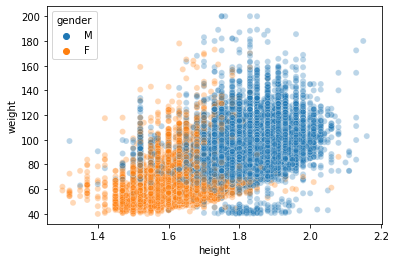

In [47]:
sns.scatterplot(data=df_19,x='height',y='weight',hue='gender',alpha=0.3);

In [48]:
# set weight and height to np.NaN if not 16 < BMI < 35
df_19.loc[df_19['BMI'] > 35, 'height'] = np.NaN
df_19.loc[df_19['BMI'] < 16, 'height'] = np.NaN
df_19.loc[df_19['BMI'] > 35, 'weight'] = np.NaN
df_19.loc[df_19['BMI'] < 16, 'weight'] = np.NaN
df_19.loc[df_19['BMI'] > 35, 'BMI'] = np.NaN
df_19.loc[df_19['BMI'] < 16, 'BMI'] = np.NaN

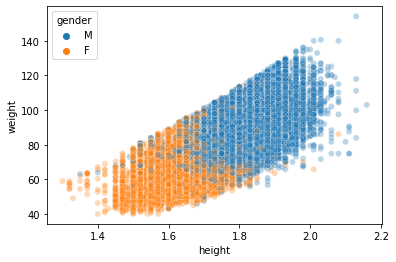

In [49]:
sns.scatterplot(data=df_19,x='height',y='weight',hue='gender',alpha=0.3);

Plot above shows a significant BMI-seperation after excluding athletes with high obesity. Since there a many senseless data regarding weight and height given and the fact that more than half of athletes did not give data at all, weight and height don't seem to be very trustful. Furthermore high weights can be explained with lbs-units instead of kg. It should be considered to drop later on in EDA.

In [50]:
# set age values to NaN if above 99 years
df_19.loc[df_19['age'] > 99, 'age'] = np.NaN

---

### Save dataframe in csv-file

In [51]:
df_19.to_csv('./data/2019_opens_clean.csv')